In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white', context='poster')

In [2]:
df=pd.read_excel('/home/suhananujum/Telecom customer Preprocessed Data.xlsx')
df.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,0,-1.277445,0,1,0,0,...,0,0,0,0,0,1,2,-1.160323,-0.398608,0
1,1,1,0,0,0,0.066327,1,0,0,2,...,2,0,0,0,1,0,3,-0.259629,-0.948762,0
2,2,1,0,0,0,-1.236724,1,0,0,2,...,0,0,0,0,0,1,3,-0.362660,-1.641883,1
3,3,1,0,0,0,0.514251,0,1,0,2,...,2,2,0,0,1,0,0,-0.746535,-0.983710,0
4,4,0,0,0,0,-1.236724,1,0,1,0,...,0,0,0,0,0,1,2,0.197365,-1.235224,1


Our aim is to do a supervised UMAP on this dataset


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [4]:
df=df.drop(columns=['Unnamed: 0'])

In [5]:
import umap

/home/suhananujum/.local/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/suhananujum/.local/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/suhananujum/.local/lib/python3.8/site-packages/umap/distances.py:1086: NumbaDeprecatio

In [6]:
data=df.iloc[:,:-1]
data.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.398608
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.948762
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-1.641883
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.983710
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-1.235224


In [7]:
target=df.iloc[:,-1]
target.head()


0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [8]:
target.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

0    5174
1    1869
Name: Churn, dtype: int64

There are 5174 people labelled 0 so for the time being we will assume that this was a low churn i.e these people renewed their subscriptions

In [9]:
classes = [
    '0',
    '1']

In [10]:
import umap

In [11]:
fit = umap.UMAP()
%time u = fit.fit_transform(data)

CPU times: user 1min 19s, sys: 1.9 s, total: 1min 21s
Wall time: 45.9 s


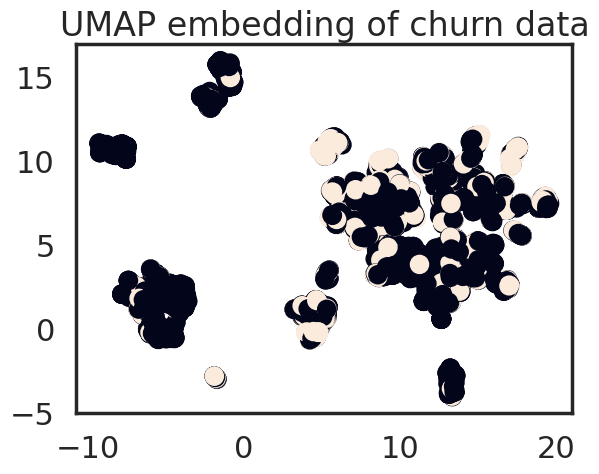

In [12]:
plt.scatter(u[:,0], u[:,1], c=target,label=target)
plt.title('UMAP embedding of churn data');
plt.show()

In [13]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    plt.scatter(u[:,0], u[:,1], c=target)
    plt.title(title, fontsize=18)
    plt.show()

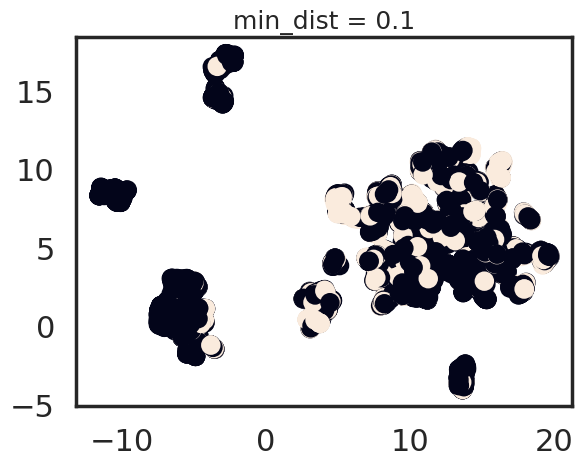

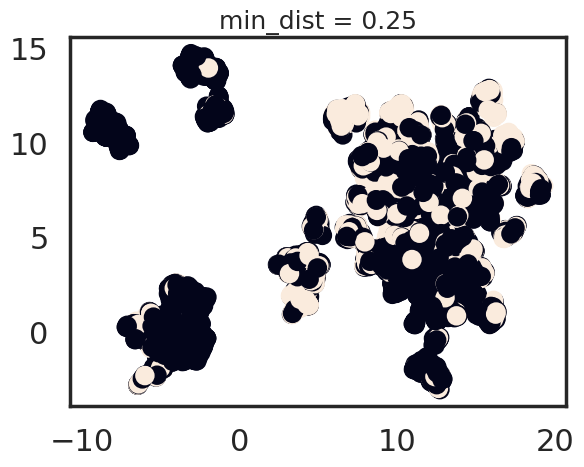

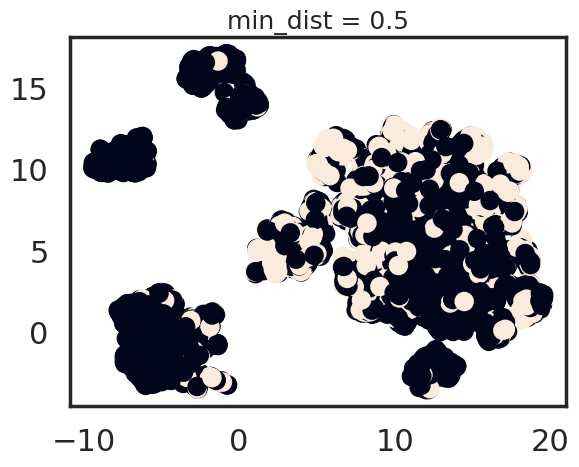

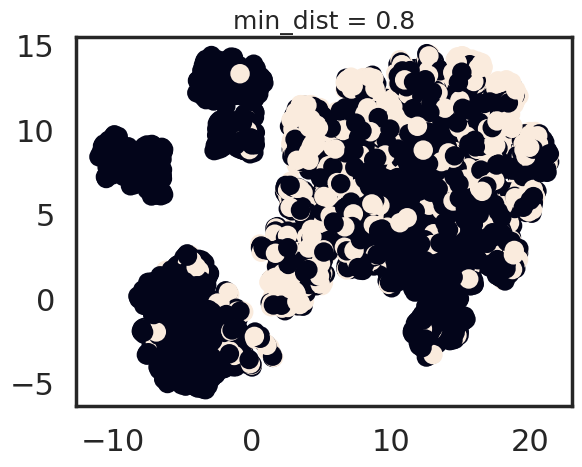

In [14]:
for d in ( 0.1, 0.25, 0.5, 0.8):
    draw_umap(min_dist=d, title='min_dist = {}'.format(d))

In [17]:
def draw_umap_label(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data,y=target);
    fig = plt.figure()
    plt.scatter(u[:,0], u[:,1], c=target)
    plt.title(title, fontsize=18)
    plt.show()

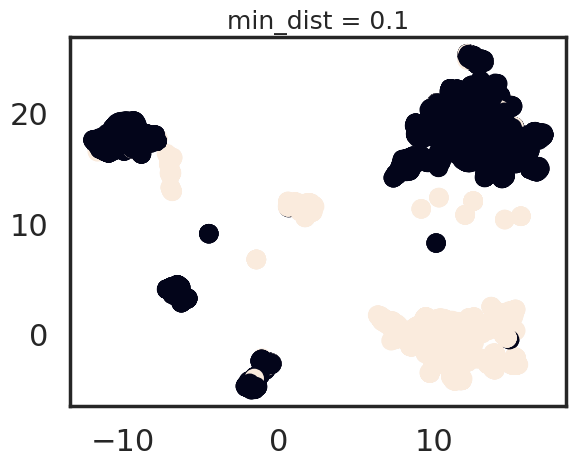

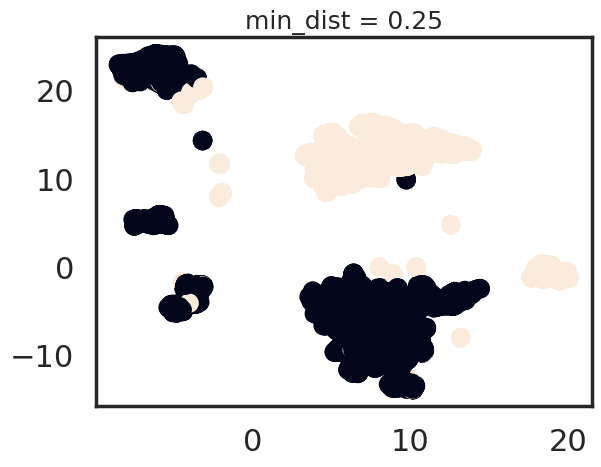

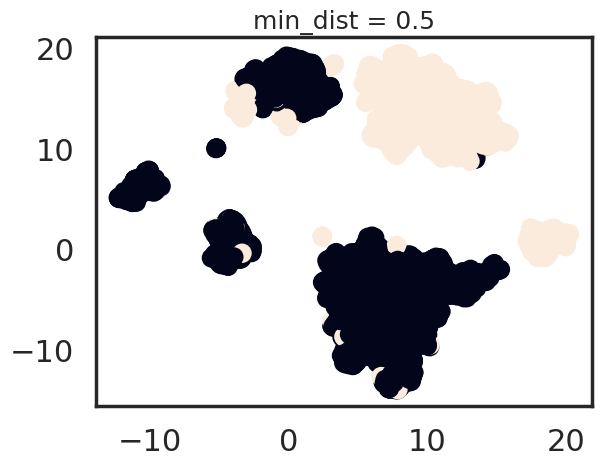

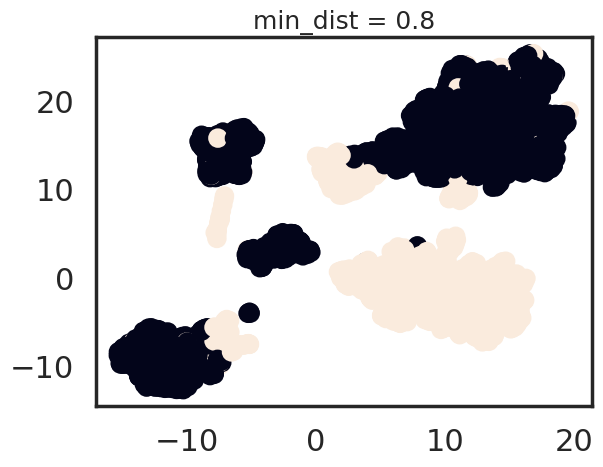

In [18]:
for d in ( 0.1, 0.25, 0.5, 0.8):
    draw_umap_label(min_dist=d, title='min_dist = {}'.format(d))

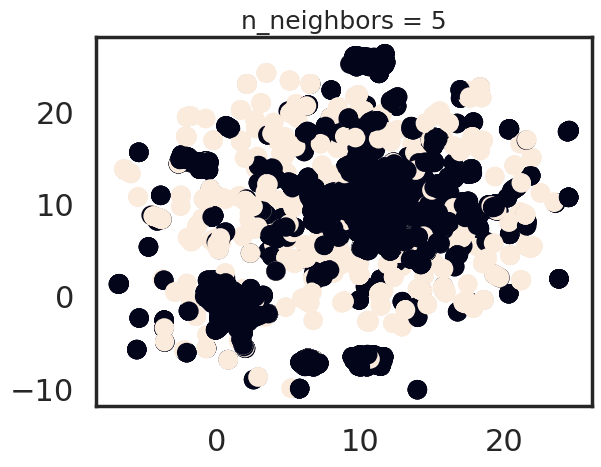

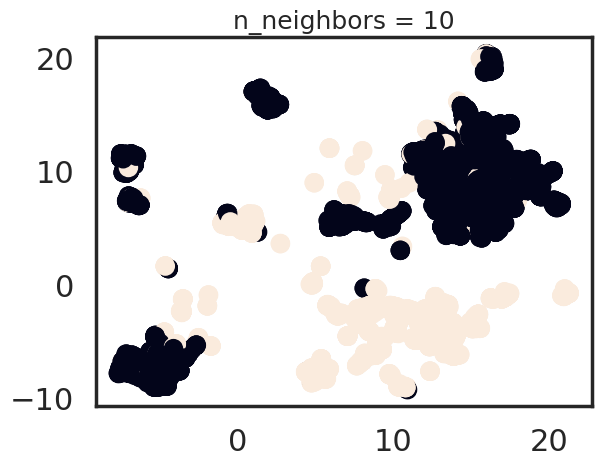

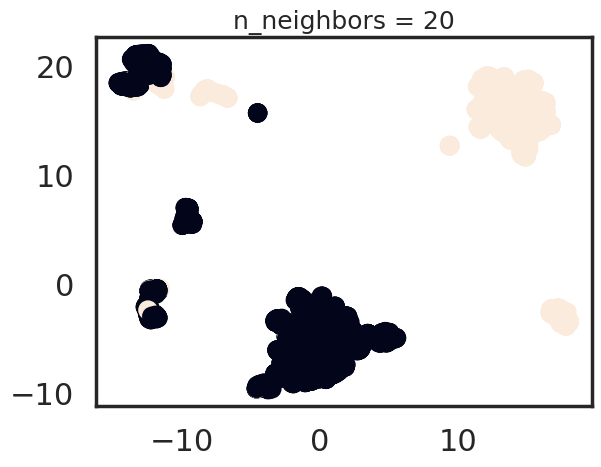

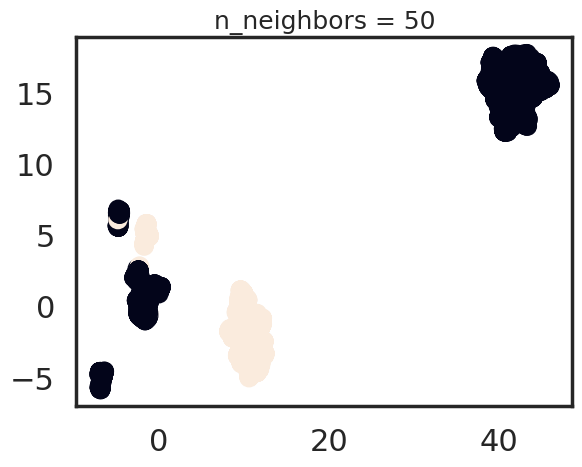

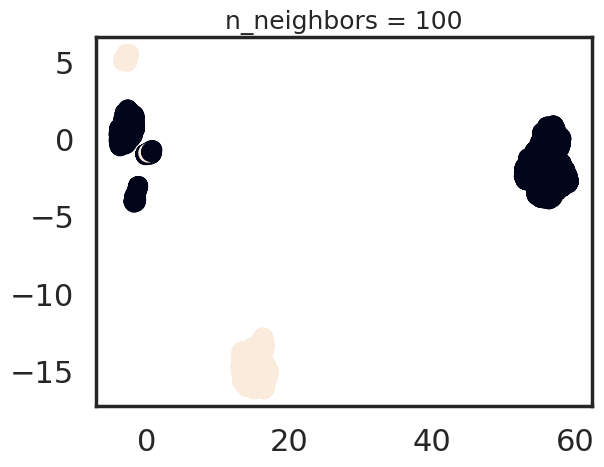

In [19]:
for n in (5, 10, 20, 50, 100):
    draw_umap_label(n_neighbors=n, title='n_neighbors = {}'.format(n))